# Announcements

* 21/9/17: Literature review
* 28/9/13: first midterm

### Papers for 26/9/17

* **MLLE: Modified Locally Linear Embedding Using Multiple Weights**, Zhenyue Zhang , Jing Wang, NIPS 2006 (Danny Luarte)
* **Accelerating t-SNE using Tree-Based Algorithms**, L.J.P. van der Maaten, Journal of Machine Learning Research 15(Oct):3221-3245, 2014. (Isaías Huerta)

# Manifold Learning

PCA, NMF, and other linear dimensionality techniques are powerful ways to reduce the size of a data set for visualization, compression, or to aid in classification and regression. Real-world data sets, however, can have very nonlinear features which are hard to capture with a simple linear basis.

### Examples:

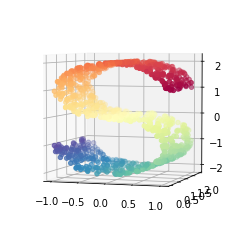

In [24]:
# 3D S-shape

import numpy as np
from sklearn import datasets
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X_S, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)

pl.clf()
fig = pl.figure(figsize=(4, 4))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_S[:, 0], X_S[:, 1], X_S[:, 2], c=color, cmap=pl.cm.Spectral)
ax.view_init(4, -72)
pl.show()

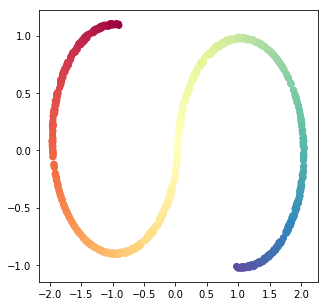

In [3]:
# lets try PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca.fit(X_S)
Y_pca = pca.transform (X_S)

pl.clf()
pl.figure(figsize=(5,5))
pl.scatter(Y_pca[:, 0], Y_pca[:, 1], c = color, cmap = pl.cm.Spectral)

pl.show()


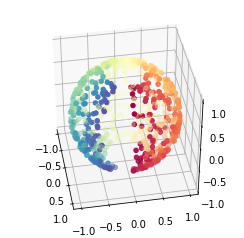

In [25]:
# now a sphere

# Create our sphere.
np.random.seed(0)
p = np.random.random(n_points) * (2 * np.pi - 0.55)
t = np.random.random(n_points) * np.pi

# Sever the poles from the sphere.
indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
color_s = p[indices]
X_sphere = np.array([np.sin(t[indices]) * np.cos(p[indices]), \
    np.sin(t[indices]) * np.sin(p[indices]), \
    np.cos(t[indices])]).transpose()
 

pl.clf()
fig = pl.figure(figsize=(4, 4))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_sphere[:, 0], X_sphere[:, 1], X_sphere[:, 2], c=color_s, cmap=pl.cm.Spectral)
ax.view_init(40, -10)
pl.show()

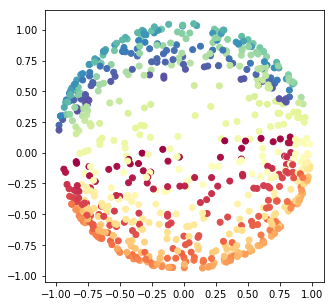

In [5]:
# PCA

pca = PCA(n_components = 2)

pca.fit(X_sphere)
Y_pca = pca.transform (X_sphere)

pl.clf()
pl.figure(figsize=(5,5))
pl.scatter(Y_pca[:, 0], Y_pca[:, 1], c = color_s, cmap = pl.cm.Spectral)

pl.show()


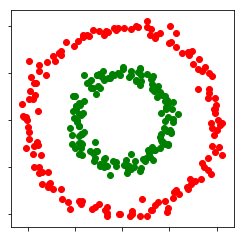

In [26]:
# circles

n_samples = 300

X_c, y_c = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

red = y_c == 0
green = y_c == 1

pl.clf()
fig = pl.figure(figsize=(4, 4))

ax = fig.add_subplot(111)
ax.scatter (X_c[red, 0], X_c[red, 1], c="r")
ax.scatter(X_c[green, 0], X_c[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
pl.axis('tight')
pl.show()

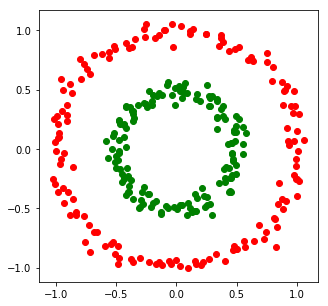

In [29]:
# PCA

pca = PCA(n_components = 2)
pca.fit(X_c)
Y_pca = pca.transform (X_c)

pl.clf()
pl.figure(figsize=(5,5))
pl.scatter(Y_pca[red, 0], Y_pca[red, 1], c = "r")
pl.scatter(Y_pca[green, 0], Y_pca[green, 1], c = "g")

pl.show()

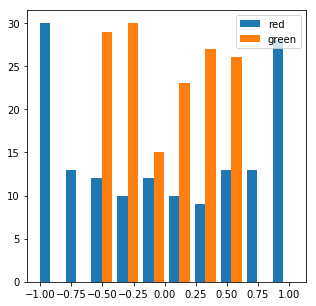

In [32]:
# PCA

pca = PCA(n_components = 1)
pca.fit(X_c)
Y_pca = pca.transform (X_c)

pl.clf()
pl.figure(figsize=(5,5))
pl.hist([Y_pca[red], Y_pca[green]], label = ["red", "green"])
pl.legend(loc = "best")
pl.show()

**Manifold**: topological space that locally resembles Euclidean space near each point. 

Manifold learning comprises a set of recent techniques which aim to accomplish this sort of nonlinear dimensionality reduction.

* A classic test case for this is the S-curve data set, shown above. 
* This is a three-dimensional space, but the points are drawn from a two-dimensional manifold which is embedded in that space. 
* Principal component analysis cannot capture this intrinsic information. 
* There is no linear projection in which distant parts of the nonlinear manifold do not overlap. 
* Manifold learning techniques, on the other hand, do allow this surface to be unwrapped or unfolded so that the underlying structure becomes clear.

## Locally Linear Embedding (LLE)

* Locally linear embedding is an unsupervised learning algorithm which attempts to embed high-dimensional data in a lower-dimensional space while preserving the geometry of local neighborhoods of each point. 
* These local neighborhoods are determined by the relation of each point to its k nearest neighbors. 
* The LLE algorithm consists of two steps: 
 * First, for each point, a set of weights is derived which best reconstruct the point from its k nearest neighbors. 
   * These weights encode the local geometry of each neighborhood. 
 * Second, with these weights held fixed, a new lower-dimensional data set is found which maintains the neighborhood relationships described by these weights.
 
### First step: find decomposition on terms of near points.

* Let $X$ be an $N × D$ matrix representing $N$ points in $D$ dimensions. 
* We seek an $N × N$ weight matrix $W$ which minimizes the reconstruction error
\begin{equation}
\epsilon_1 = |X - WX|^2
\end{equation}
* The portion of the reconstruction error associated with this single point can be written
\begin{equation}
\epsilon_1 = \sum_{i= 1}^N \left|\boldsymbol{x}_i - \sum W_{ij}\boldsymbol{x}_j\right|^2
\end{equation}
* What does it mean to minimize this equation with respect to the weights $W$? 
  * What we are doing is finding the linear combination of points in the data set which best reconstructs each point from the others.
  * This is, essentially, finding the hyperplane that best describes the local surface at each point within the data set. 
  * Each row of the weight matrix $W$ gives a set of weights for the corresponding point. 
  * As written above, the expression can be trivially minimized by setting $W = I$, the identity matrix.
  * To prevent this simplistic solution, we can constrain the problem such that thediagonal $W{ii} =0$  $\forall i$.
  * This constraint leads to a much more interesting solution. In this case the matrix $W$ would in some sense encode the global geometric properties of the data set: how each point relates to all the others.
* LLE constrain all $W_{ij} = 0$ except when a point $j$ is one of the $k$ nearest neighbors of point $i$.
* Some properties thanks to this constraint:
  * $W$ becomes very sparse for $k ≪ N$. Out of the $N^2$ entries in $W$, only $Nk$ are nonzero.
  * The rows of $W$ encode the local properties of the data set: how each point relates to its nearest neighbors.
  * $W$ as a whole encodes the aggregate of these local properties, and thus contains global information about the geometry of the data set, viewed through the lens of connected local neighborhoods.
  
### Second step: reduce dimensionality
* Now, we mirror the first step, but instead seek an $N\times d$ matrix $Y$, where $d < D$.
* $Y$ is found by minimizing
\begin{equation}
\epsilon_2 = |Y - WY|^2
\end{equation}
keeping $W$ fixed.
* Because of this symmetry and the constraints put on $W$, local neighborhoods in the low-dimensional embedding, $Y$, will reflect the properties of corresponding local neighborhoods in $X$.

### The algorithm:

* Step 1: 
  * Nearest neighbours search
  * least-squares solution to the corresponding row of the weight matrix $W$.
* Step 2: 
  * eigenvalue decomposition of the matrix $C_W ≡ (I−W)^\top(I−W)$, which is an $N×N$ sparse matrix.
* Algorithms for direct eigenvalue decomposition scale as $O(N^3)$.
* Iterative methods can improve on this: Arnoldi decomposition (related to the Lanczos method) allows a few extremal eigenvalues of a sparse matrix to be found relatively efficiently. This is out of the scope of this course.


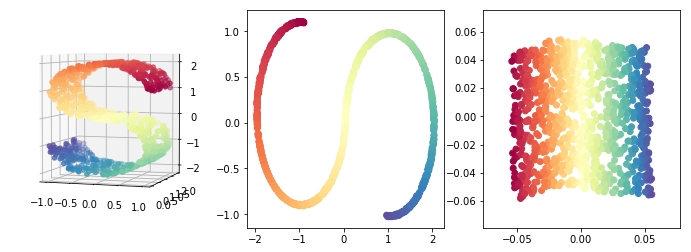

In [44]:
# S_shape
from sklearn.manifold import LocallyLinearEmbedding

n_points = 1000
X_S, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)

pca = PCA(n_components = 2)
pca.fit(X_S)
Y_pca = pca.transform (X_S)

k = 6
#lle = LocallyLinearEmbedding (k, 2)
lle = LocallyLinearEmbedding (k, 2, method = "modified")
lle.fit(X_S)
Y_lle = lle.transform(X_S)

pl.clf()
fig = pl.figure(figsize=(12, 4))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(X_S[:, 0], X_S[:, 1], X_S[:, 2], c=color, cmap=pl.cm.Spectral)
ax.view_init(4, -72)

ax = fig.add_subplot(132)
ax.scatter (Y_pca[:, 0], Y_pca[:, 1], c=color, cmap=pl.cm.Spectral)

ax = fig.add_subplot(133)
ax.scatter (Y_lle[:, 0], Y_lle[:, 1], c=color, cmap=pl.cm.Spectral)
pl.show()


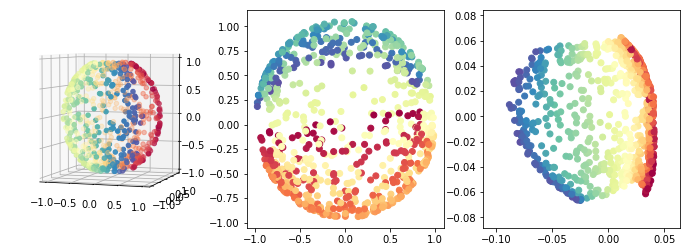

In [48]:
# sphere

pca = PCA(n_components = 2)
pca.fit(X_sphere)
Y_pca = pca.transform (X_sphere)

k = 5
#lle = LocallyLinearEmbedding (k, 2)
lle = LocallyLinearEmbedding (k, 2, method = "modified")
lle.fit(X_sphere)
Y_lle = lle.transform(X_sphere)

pl.clf()
fig = pl.figure(figsize=(12, 4))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(X_sphere[:, 0], X_sphere[:, 1], X_sphere[:, 2], c=color_s, cmap=pl.cm.Spectral)
ax.view_init(4, -72)

ax = fig.add_subplot(132)
ax.scatter (Y_pca[:, 0], Y_pca[:, 1], c=color_s, cmap=pl.cm.Spectral)

ax = fig.add_subplot(133)
ax.scatter (Y_lle[:, 0], Y_lle[:, 1], c=color_s, cmap=pl.cm.Spectral)
pl.show()

## Isometric Mapping (IsoMap)

But first....

### Multidimensional Scaling (MDS)

* Consider s data set represented by an $N × D$ matrix $X$.
* You can trivially compute an $N × N$ distance matrix $D_X$ such that $[ D_X ]_{i j}$ contains the distance between points $i$ and $j$.
* Classical MDS seeks to reverse this operation: given a distance matrix $D_X$, MDS discovers a new data set $Y$ which minimizes the error
\begin{equation}
\epsilon_{XY} = |\tau(D_X)-\tau(D_Y)|^2,
\end{equation}
where $\tau$ is an operator with a form chosen to simplify the analytic form of the
solution.
* Metric MDS: 
\begin{equation}
\tau(D) = \frac{HSH}{2},
\end{equation}
where $S_{ij} = D_{ij}^2$, and $H_{ij} = \delta_{ij}-1/N$ is called the _centering matrix_.
* This choice of $\tau$ is convenient because it can then be shown that the optimal embedding $Y$ is identical to the top D eigenvectors of the matrix $\tau ( D_X )$.

Now, back to **IsoMap**...

* IsoMap uses MDS to derive a nonlinear embedding by constructing a suitable stand-in for the distance matrix $D_X$.
* IsoMap recovers nonlinear structure by approximating geodesic curves which lie within the embedded manifold, and computing the distances between each point in the data set along these geodesic curves.
  * **Geodesic**: generalization of the notion of a "straight line" to "curved spaces". 
    * A geodesic is defined to be a curve whose tangent vectors remain parallel if they are transported along it.
  ![Geodesic](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Geodesics_and_geodesic_circles_on_an_oblate_ellipsoid.svg/220px-Geodesics_and_geodesic_circles_on_an_oblate_ellipsoid.svg.png)
* The IsoMap algorithm creates a connected graph G representing the data, where Gij is the distance between point i and point j if points i and j are neighbors, and G i j = 0 otherwise.

![Geodesic graph](http://masc.cs.gmu.edu/wiki/uploads/MSumScaling/Screen%20Shot%202012-09-06%20at%205.20.06%20PM.png)

* Next, the algorithm constructs a matrix $D′_X$ such that $[ D′_X ]_{i j}$ contains the length of the shortest path between point $i$ and $j$ traversing the graph $G$.
* Using this distance matrix, the optimal d-dimensional embedding is found using the MDS algorithm.

But what about complexity?
* Similar to LLE:
  * Creating the graph: nearest-neighbor search.
  * Final step: eigendecomposition of $N\times N$ matrix

But!
* IsoMap has to compute the pairwise shortest paths on an order-N sparse graph G.
  * Brute force: $O(N^2k^N)$, where $k$ is the number of paths to be found.
  * Floyd–Warshall algorithm: $O(N^3)$
  * Dijkstra algorithm: $O(N^2(k+\log N))$
 
 TODO: Sparse graph complecity?

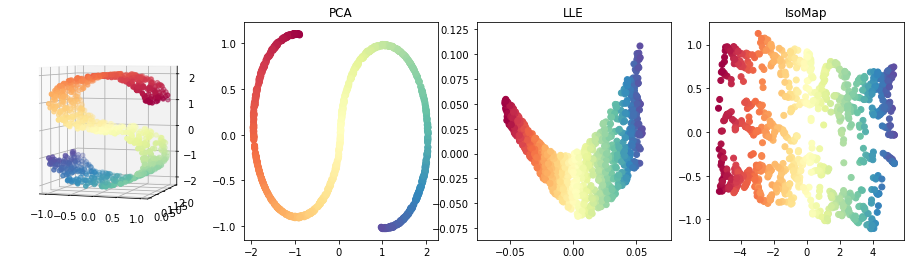

In [49]:
# IsoMap for the S shape

from sklearn.manifold import Isomap

pca = PCA(n_components = 2)
pca.fit(X_S)
Y_pca = pca.transform (X_S)

k = 10
lle = LocallyLinearEmbedding (k, 2)
#lle = LocallyLinearEmbedding (k, 2, method = "modified")
lle.fit(X_S)
Y_lle = lle.transform(X_S)

k = 5
n = 2
iso = Isomap (k, n)
iso.fit(X_S)
Y_iso  = iso.transform (X_S)

pl.clf()
fig = pl.figure(figsize=(16, 4))

ax = fig.add_subplot(141, projection='3d')
ax.scatter(X_S[:, 0], X_S[:, 1], X_S[:, 2], c=color, cmap=pl.cm.Spectral)
ax.view_init(4, -72)

ax = fig.add_subplot(142)
ax.scatter (Y_pca[:, 0], Y_pca[:, 1], c=color, cmap=pl.cm.Spectral)
ax.set_title ("PCA")

ax = fig.add_subplot(143)
ax.scatter (Y_lle[:, 0], Y_lle[:, 1], c=color, cmap=pl.cm.Spectral)
ax.set_title ("LLE")

ax = fig.add_subplot(144)
ax.scatter (Y_iso[:, 0], Y_iso[:, 1], c=color, cmap=pl.cm.Spectral)
ax.set_title ("IsoMap")

pl.show()

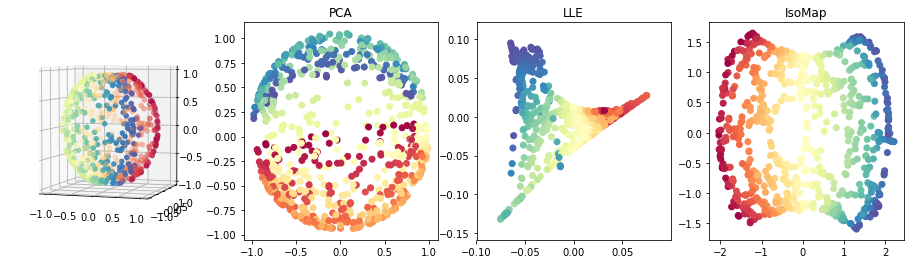

In [50]:
# sphere
pca = PCA(n_components = 2)
pca.fit(X_sphere)
Y_pca = pca.transform (X_sphere)

k = 5
lle = LocallyLinearEmbedding (k, 2)
#lle = LocallyLinearEmbedding (k, 2, method = "modified")
lle.fit(X_sphere)
Y_lle = lle.transform(X_sphere)

iso.fit(X_sphere)
Y_iso  = iso.transform (X_sphere)

pl.clf()
fig = pl.figure(figsize=(16, 4))

ax = fig.add_subplot(141, projection='3d')
ax.scatter(X_sphere[:, 0], X_sphere[:, 1], X_sphere[:, 2], c=color_s, cmap=pl.cm.Spectral)
ax.view_init(4, -72)

ax = fig.add_subplot(142)
ax.scatter (Y_pca[:, 0], Y_pca[:, 1], c=color_s, cmap=pl.cm.Spectral)
ax.set_title ("PCA")

ax = fig.add_subplot(143)
ax.scatter (Y_lle[:, 0], Y_lle[:, 1], c=color_s, cmap=pl.cm.Spectral)
ax.set_title ("LLE")

ax = fig.add_subplot(144)
ax.scatter (Y_iso[:, 0], Y_iso[:, 1], c=color_s, cmap=pl.cm.Spectral)
ax.set_title ("IsoMap")

pl.show()

## Weaknesses of Manifold Learning

* Noisy and gappy data 
* Sensitivity to outliers
* Tuning parameters
* Estimation of new dimensionality
* Reconstruction from the manifold